In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatial_profiles as prf
import models
import boundary_conditions
import plotting

%matplotlib notebook

In [2]:
ion_concentration_molar = 0.1
ion_diameter_m = 10e-10
x = prf.get_x_axis_nm(100, 1000)
bc = boundary_conditions.Dirichlet(phi_0=0.5)
xmin = -0.05
xmax = 10

## Gouy-Chapman
Gives insight, but ion concentrations are much too high.

<IPython.core.display.Javascript object>


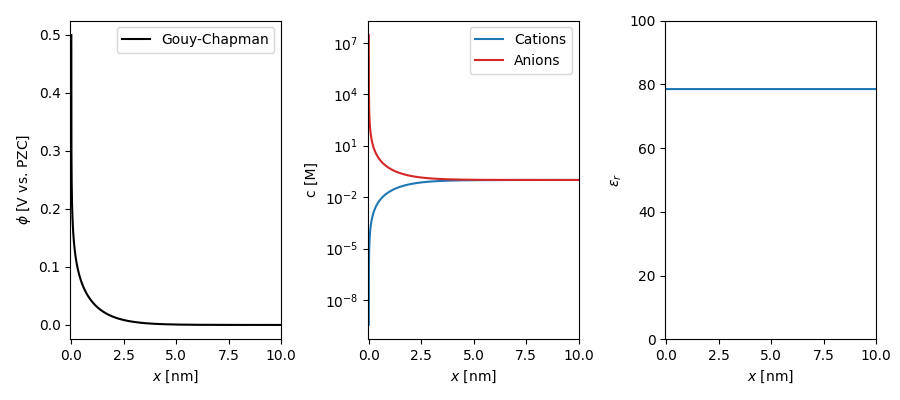

In [3]:
gc = models.GouyChapman(ion_concentration_molar)
gc_sol = gc.solve(x, bc)

fig, ax = plotting.plot_solution(gc_sol, xmin, xmax)
plt.show()

## Borukhov-Andelman-Orland
Ion concentration is limited to its maximum value at the electrode.

<IPython.core.display.Javascript object>


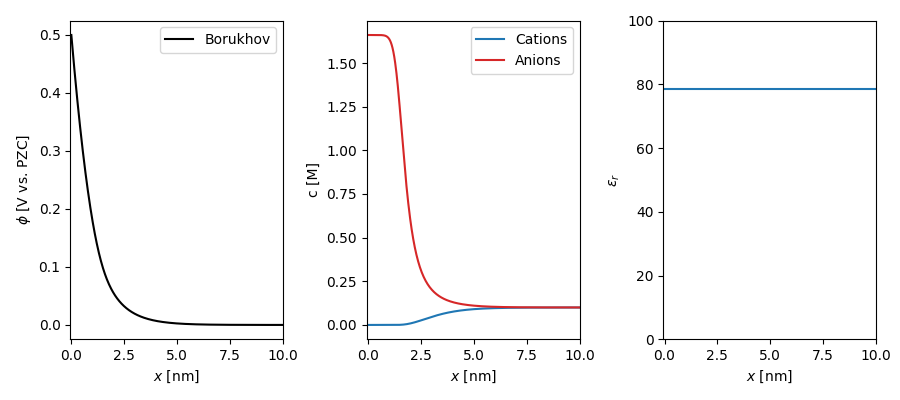

In [4]:
bao = models.BorukhovAndelmanOrland(ion_concentration_molar, ion_diameter_m)
bao_sol = bao.solve(x, bc)

fig, ax = plotting.plot_solution(bao_sol, xmin, xmax, logscale=False)
plt.show()

## Abrashkin-Andelman-Orland
A Stern layer emerges if the dipole energy is more negative (large dipole moment and large electric field) than the Coulomb energy of ions directly at the electrode.

<IPython.core.display.Javascript object>


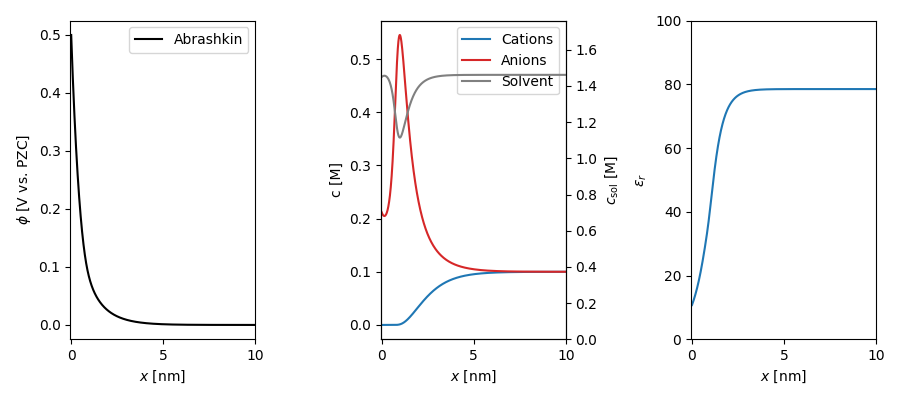

In [5]:
abr = models.AbrashkinAndelmanOrland(ion_concentration_molar, ion_diameter_m, eps_r_opt=1)
abr_sol = abr.solve(x, bc)

fig, ax = plotting.plot_solution(abr_sol, xmin, xmax, logscale=False, plot_water=True)
plt.show()

## Huang-Chen-Eikerling


<IPython.core.display.Javascript object>


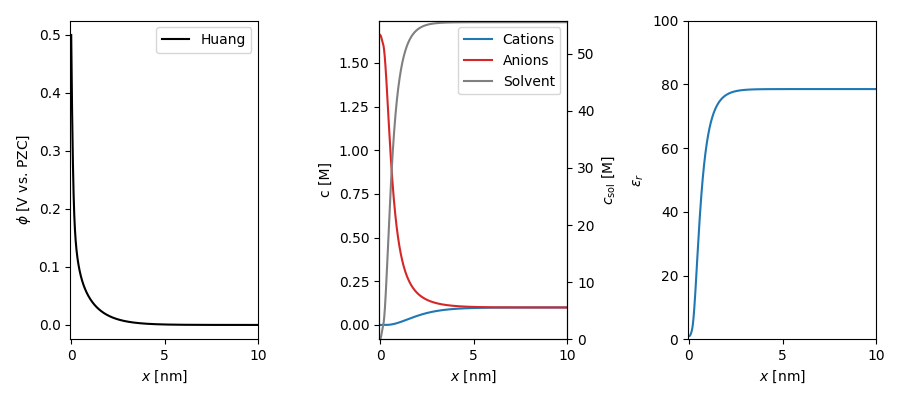

In [6]:
huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, 2.75e-10, eps_r_opt=1)
huang_sol = huang.solve(x, bc)

fig, ax = plotting.plot_solution(huang_sol, xmin, xmax, logscale=False, plot_water=True)
plt.show()

## Huang simplified

<IPython.core.display.Javascript object>


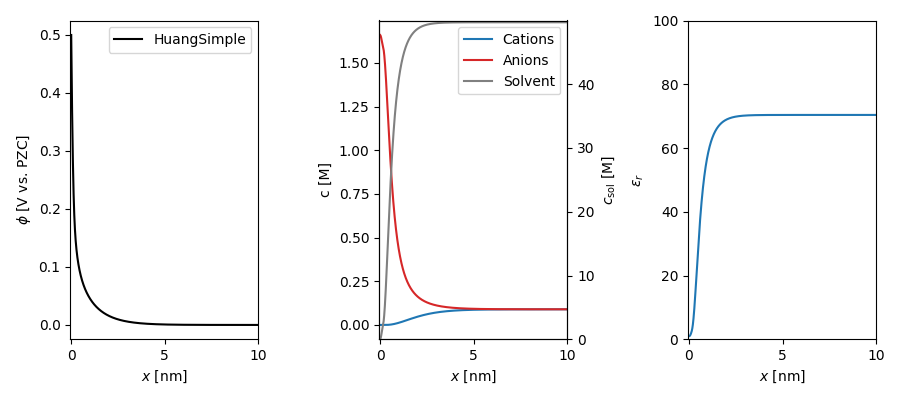

In [7]:
simple = models.HuangSimple(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=1)
simple_sol = simple.solve(x, bc)

fig, ax = plotting.plot_solution(simple_sol, xmin, xmax, logscale=False, plot_water=True)
plt.show()